# XGBOOST default model!

## Conect to Drive

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and prepare data

In [109]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import data_table
data_table.enable_dataframe_formatter()

# load data
file = '/content/drive/MyDrive/Working on/Kidney stone experiments/3. Shallow methods/features_jelbeze.xlsx'
labels_ = ['AU','BRU','CYS','STR','WD','WW']

In [110]:
#sheet = 'section.train'
#sheet = 'surface.train'
sheet = 'mixed.train'
df_train = pd.read_excel(file, sheet_name=sheet)
df_train

,class,label,h0,h1,h2,h3,h4,h5,h6,h7,...,lbp0x,lbp1x,lbp2x,lbp3x,lbp4x,lbp5x,lbp6x,lbp7x,lbp8x,lbp9x
0,AU,0,55357,5801,1889,890,356,140,62,13,...,0.342449,0.063182,0.048902,0.118550,0.070996,0.006197,0.111815,0.193587,0.038259,0.006062
1,AU,0,33471,9775,12004,6133,1953,788,270,95,...,0.414816,0.100916,0.038725,0.088498,0.095233,0.013259,0.077660,0.125750,0.035883,0.009260
2,AU,0,56608,5029,1613,734,313,136,60,13,...,0.316425,0.064723,0.040580,0.113908,0.067548,0.003467,0.109413,0.242584,0.036214,0.005137
3,AU,0,35492,9455,11922,5204,1539,599,220,70,...,0.288686,0.064890,0.036775,0.094917,0.067926,0.005960,0.117296,0.277440,0.037337,0.008772
4,AU,0,33963,12939,9974,5186,1720,493,154,60,...,0.220945,0.089580,0.038130,0.108514,0.089449,0.029250,0.096109,0.296944,0.020501,0.010577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,WW,5,53992,7686,1962,560,197,40,30,25,...,0.302697,0.072990,0.043973,0.118113,0.064298,0.004985,0.116068,0.229963,0.039115,0.007798
4796,WW,5,45427,13704,3406,1311,383,192,56,18,...,0.358587,0.081477,0.042790,0.100528,0.096864,0.005422,0.090563,0.182151,0.034144,0.007474
4797,WW,5,49538,10541,2501,1099,522,205,64,22,...,0.317254,0.073686,0.044323,0.107662,0.064877,0.004614,0.107942,0.236158,0.034116,0.009368
4798,WW,5,64300,57,3,3,13,49,25,26,...,0.309997,0.046342,0.030288,0.083747,0.094009,0.004303,0.119993,0.270937,0.036577,0.003807


In [111]:
#sheet = 'section.test'
#sheet = 'surface.test'
sheet = 'mixed.test'
df_test = pd.read_excel(file, sheet_name=sheet)
df_test

,class,label,h0,h1,h2,h3,h4,h5,h6,h7,...,lbp0x,lbp1x,lbp2x,lbp3x,lbp4x,lbp5x,lbp6x,lbp7x,lbp8x,lbp9x
0,AU,0,42311,7648,8339,4668,1030,358,119,39,...,0.335859,0.085859,0.044192,0.106313,0.082828,0.009975,0.105682,0.184470,0.034470,0.010354
1,AU,0,64496,3,4,3,2,1,2,2,...,0.284522,0.119300,0.038536,0.083494,0.081085,0.031952,0.062781,0.263487,0.021034,0.013809
2,AU,0,61937,2207,157,109,30,32,22,12,...,0.423332,0.074869,0.048575,0.082757,0.095765,0.008027,0.089953,0.120675,0.046914,0.009134
3,AU,0,64283,45,4,18,21,51,49,23,...,0.367756,0.080349,0.044146,0.104571,0.086470,0.008465,0.090116,0.177627,0.031254,0.009246
4,AU,0,53394,8334,1781,661,192,82,46,14,...,0.358074,0.070024,0.043406,0.097305,0.094102,0.010713,0.097526,0.178264,0.041418,0.009167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,WW,5,62774,477,68,109,138,180,538,31,...,0.324624,0.067414,0.046340,0.112398,0.074686,0.005669,0.119300,0.203352,0.038452,0.007764
1196,WW,5,64144,72,6,8,30,96,76,34,...,0.374545,0.086733,0.043555,0.103301,0.075687,0.005648,0.100289,0.160412,0.040542,0.009288
1197,WW,5,64157,10,0,0,0,53,241,9,...,0.371877,0.082321,0.045734,0.094881,0.068942,0.005324,0.102935,0.174744,0.044915,0.008328
1198,WW,5,61166,1677,257,381,234,237,388,34,...,0.353804,0.087510,0.050247,0.110880,0.068034,0.009348,0.090496,0.177876,0.039990,0.011815


In [112]:
# split data into X and Y
X_train, y_train = df_train.iloc[:,2:], df_train.iloc[:,1]
print(X_train.head())
print(y_train.head())

      h0     h1     h2    h3    h4   h5   h6  h7  h8  h9  ...     lbp0x  \
0  55357   5801   1889   890   356  140   62  13   5   3  ...  0.342449   
1  33471   9775  12004  6133  1953  788  270  95  11  16  ...  0.414816   
2  56608   5029   1613   734   313  136   60  13   6   4  ...  0.316425   
3  35492   9455  11922  5204  1539  599  220  70  13   2  ...  0.288686   
4  33963  12939   9974  5186  1720  493  154  60  23   4  ...  0.220945   

      lbp1x     lbp2x     lbp3x     lbp4x     lbp5x     lbp6x     lbp7x  \
0  0.063182  0.048902  0.118550  0.070996  0.006197  0.111815  0.193587   
1  0.100916  0.038725  0.088498  0.095233  0.013259  0.077660  0.125750   
2  0.064723  0.040580  0.113908  0.067548  0.003467  0.109413  0.242584   
3  0.064890  0.036775  0.094917  0.067926  0.005960  0.117296  0.277440   
4  0.089580  0.038130  0.108514  0.089449  0.029250  0.096109  0.296944   

      lbp8x     lbp9x  
0  0.038259  0.006062  
1  0.035883  0.009260  
2  0.036214  0.005137  
3 

In [113]:
# split data into X and Y
X_test, y_test = df_test.iloc[:,2:], df_test.iloc[:,1]
print(X_test.head())
print(y_test.head())

      h0    h1    h2    h3    h4   h5   h6  h7  h8  h9  ...     lbp0x  \
0  42311  7648  8339  4668  1030  358  119  39   3   1  ...  0.335859   
1  64496     3     4     3     2    1    2   2   2   1  ...  0.284522   
2  61937  2207   157   109    30   32   22  12   5   5  ...  0.423332   
3  64283    45     4    18    21   51   49  23  14   8  ...  0.367756   
4  53394  8334  1781   661   192   82   46  14   8   4  ...  0.358074   

      lbp1x     lbp2x     lbp3x     lbp4x     lbp5x     lbp6x     lbp7x  \
0  0.085859  0.044192  0.106313  0.082828  0.009975  0.105682  0.184470   
1  0.119300  0.038536  0.083494  0.081085  0.031952  0.062781  0.263487   
2  0.074869  0.048575  0.082757  0.095765  0.008027  0.089953  0.120675   
3  0.080349  0.044146  0.104571  0.086470  0.008465  0.090116  0.177627   
4  0.070024  0.043406  0.097305  0.094102  0.010713  0.097526  0.178264   

      lbp8x     lbp9x  
0  0.034470  0.010354  
1  0.021034  0.013809  
2  0.046914  0.009134  
3  0.031254  0

## Train the XGBoost Model

In [114]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(objective='multi:softprob')


## Make Predictions with XGBoost Model

In [115]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#print(predictions)

In [116]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("\n ********** Accuracy: %.2f%%" % (accuracy * 100.0),'**********')


 ********** Accuracy: 49.42% **********


In [117]:
type(y_test)
y_test = y_test.tolist()
#print(y_test)

## Confusion Matrix

In [118]:
# matrix confusion
data = {'y_Actual':    y_test,
        'y_Predicted': predictions
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#df.to_csv(r'/content/drive/MyDrive/3 - Experiments/6 - Kindey stones/Proyecto_CalculosRenales/Avances/XGBoost/surfaces4class.csv')

In [119]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print('\n ********** Confusion matrix **********  \n')
print(confusion_matrix)

column_maxes = confusion_matrix.max()
df_max = column_maxes.max()
normalized_df = confusion_matrix / df_max
print('\n ********** Normalized results **********  \n')
print(normalized_df)


 ********** Confusion matrix **********  

Predicted    0    1    2   3   4    5
Actual                               
0          101    1    1  28   1   68
1           46   57    0  24   0   73
2            0    0  200   0   0    0
3           68    0    1  91   1   39
4            2  171    4   0  19    4
5           56    0    0  19   0  125

 ********** Normalized results **********  

Predicted      0      1      2      3      4      5
Actual                                             
0          0.505  0.005  0.005  0.140  0.005  0.340
1          0.230  0.285  0.000  0.120  0.000  0.365
2          0.000  0.000  1.000  0.000  0.000  0.000
3          0.340  0.000  0.005  0.455  0.005  0.195
4          0.010  0.855  0.020  0.000  0.095  0.020
5          0.280  0.000  0.000  0.095  0.000  0.625


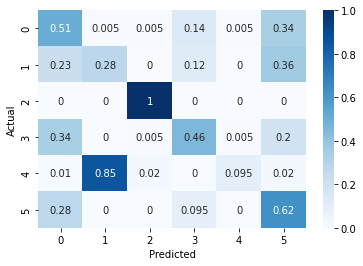

              precision    recall  f1-score   support

           0       0.37      0.51      0.43       200
           1       0.25      0.28      0.27       200
           2       0.97      1.00      0.99       200
           3       0.56      0.46      0.50       200
           4       0.90      0.10      0.17       200
           5       0.40      0.62      0.49       200

    accuracy                           0.49      1200
   macro avg       0.58      0.49      0.47      1200
weighted avg       0.58      0.49      0.47      1200



In [120]:
# Confusion Matrix using seaborn

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_test':    y_test,
        'y_pred': predictions
        }

df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Test'], colnames=['Predicted'])
sn.heatmap(normalized_df, annot=True, cmap="Blues")
plt.show()

from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

## Tested 


### Table results

> View| Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   6 | 52.42%   | 0.54      | 0.52   | 0.51
> Surface |   6 | 43.25%   | 0.51      | 0.43   | 0.40  
> Mixed   |   6 | 49.42%   | 0.58      | 0.49   | 0.47


# Hyperparameter optimization

## Conect to Drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions

In [35]:
import pandas as pd
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [36]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Load and prepare data

In [37]:
# load data
file = '/content/drive/MyDrive/Working on/Kidney stone experiments/3. Shallow methods/features_jelbeze.xlsx'
labels_ = ['AU','BRU','CYS','STR','WD','WW']

In [38]:
#sheet = 'section.train'
#sheet = 'surface.train'
sheet = 'mixed.train'
df_train = pd.read_excel(file, sheet_name=sheet)
print('df_train:'); print(''); print(df_train.head()); print('')

# split data into X and Y
X_train, y_train = df_train.iloc[:,2:], df_train.iloc[:,1]
print('X_train:'); print(''); print(X_train.head()); print('')
print('y_train:'); print('');print(y_train.head()); print('')

df_train:

  class  label     h0     h1     h2    h3    h4   h5   h6  h7  ...     lbp0x  \
0    AU      0  55357   5801   1889   890   356  140   62  13  ...  0.342449   
1    AU      0  33471   9775  12004  6133  1953  788  270  95  ...  0.414816   
2    AU      0  56608   5029   1613   734   313  136   60  13  ...  0.316425   
3    AU      0  35492   9455  11922  5204  1539  599  220  70  ...  0.288686   
4    AU      0  33963  12939   9974  5186  1720  493  154  60  ...  0.220945   

      lbp1x     lbp2x     lbp3x     lbp4x     lbp5x     lbp6x     lbp7x  \
0  0.063182  0.048902  0.118550  0.070996  0.006197  0.111815  0.193587   
1  0.100916  0.038725  0.088498  0.095233  0.013259  0.077660  0.125750   
2  0.064723  0.040580  0.113908  0.067548  0.003467  0.109413  0.242584   
3  0.064890  0.036775  0.094917  0.067926  0.005960  0.117296  0.277440   
4  0.089580  0.038130  0.108514  0.089449  0.029250  0.096109  0.296944   

      lbp8x     lbp9x  
0  0.038259  0.006062  
1  0.0358

In [39]:
xgb_model = xgb.XGBClassifier()
print(xgb_model)

XGBClassifier()


## Tuning the hyper-parameters

In [40]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train, y_train)

print('\n ********** Hyper-parameters ********** \n')
report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits

 ********** Hyper-parameters ********** 

Model with rank: 1
Mean validation score: 0.974 (std: 0.003)
Parameters: {'colsample_bytree': 0.7467983561008608, 'gamma': 0.02904180608409973, 'learning_rate': 0.28985284373248055, 'max_depth': 5, 'n_estimators': 139, 'subsample': 0.8832290311184181}

Model with rank: 1
Mean validation score: 0.974 (std: 0.003)
Parameters: {'colsample_bytree': 0.8196462704334383, 'gamma': 0.21676036879037103, 'learning_rate': 0.25321279289973464, 'max_depth': 3, 'n_estimators': 136, 'subsample': 0.673733469732548}



**Section.train**

********** Hyper-parameters ********** 

Model with rank: 1
Mean validation score: 0.962 (std: 0.006)
Parameters: {'colsample_bytree': 0.7550213529560301, 'gamma': 0.15212112147976886, 'learning_rate': 0.18742692948967135, 'max_depth': 5, 'n_estimators': 124, 'subsample': 0.7164916560792167}

Model with rank: 1
Mean validation score: 0.962 (std: 0.005)
Parameters: {'colsample_bytree': 0.9406590942262119, 'gamma': 0.03727532183988541, 'learning_rate': 0.3260660809801552, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.679486272613669}

Model with rank: 1
Mean validation score: 0.962 (std: 0.005)
Parameters: {'colsample_bytree': 0.8883701168472723, 'gamma': 0.040879515974435954, 'learning_rate': 0.29207358723203314, 'max_depth': 4, 'n_estimators': 147, 'subsample': 0.6244311839419455}


**Surface.train** 

********** Hyper-parameters ********** 

Model with rank: 1
Mean validation score: 0.941 (std: 0.003)
Parameters: {'colsample_bytree': 0.796805916483275, 'gamma': 0.02170039164908638, 'learning_rate': 0.30739299906707884, 'max_depth': 5, 'n_estimators': 136, 'subsample': 0.7011960671956965}



**Mixed.train**

 ********** Hyper-parameters ********** 

Model with rank: 1
Mean validation score: 0.974 (std: 0.003)
Parameters: {'colsample_bytree': 0.7467983561008608, 'gamma': 0.02904180608409973, 'learning_rate': 0.28985284373248055, 'max_depth': 5, 'n_estimators': 139, 'subsample': 0.8832290311184181}

Model with rank: 1
Mean validation score: 0.974 (std: 0.003)
Parameters: {'colsample_bytree': 0.8196462704334383, 'gamma': 0.21676036879037103, 'learning_rate': 0.25321279289973464, 'max_depth': 3, 'n_estimators': 136, 'subsample': 0.673733469732548}


In [ ]:
#section:
#Parameters: {'colsample_bytree': 0.9078671076075817, 'gamma': 0.17416830222659868, 'learning_rate': 0.3109944455567122, 'max_depth': 5, 'n_estimators': 135, 'subsample': 0.7671784126862315}
#surface:
#Parameters: {'colsample_bytree': 0.8045997961875188, 'gamma': 0.04808827554571038, 'learning_rate': 0.31215697934688114, 'max_depth': 5, 'n_estimators': 138, 'subsample': 0.9746919954946938}
#merged:
#Parameters: {'colsample_bytree': 0.8045997961875188, 'gamma': 0.04808827554571038, 'learning_rate': 0.31215697934688114, 'max_depth': 5, 'n_estimators': 138, 'subsample': 0.9746919954946938}


# XGBOOST hyper model

## Conect to Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and prepare data

In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import data_table
data_table.enable_dataframe_formatter()

# load data
file = '/content/drive/MyDrive/Working on/Kidney stone experiments/3. Shallow methods/features_jelbeze.xlsx'
labels_ = ['AU','BRU','CYS','STR','WD','WW']

In [28]:
#sheet = 'section.train'
#sheet = 'surface.train'
sheet = 'mixed.train'
df_train = pd.read_excel(file, sheet_name=sheet)
df_train

,class,label,h0,h1,h2,h3,h4,h5,h6,h7,...,lbp0x,lbp1x,lbp2x,lbp3x,lbp4x,lbp5x,lbp6x,lbp7x,lbp8x,lbp9x
0,AU,0,55357,5801,1889,890,356,140,62,13,...,0.342449,0.063182,0.048902,0.118550,0.070996,0.006197,0.111815,0.193587,0.038259,0.006062
1,AU,0,33471,9775,12004,6133,1953,788,270,95,...,0.414816,0.100916,0.038725,0.088498,0.095233,0.013259,0.077660,0.125750,0.035883,0.009260
2,AU,0,56608,5029,1613,734,313,136,60,13,...,0.316425,0.064723,0.040580,0.113908,0.067548,0.003467,0.109413,0.242584,0.036214,0.005137
3,AU,0,35492,9455,11922,5204,1539,599,220,70,...,0.288686,0.064890,0.036775,0.094917,0.067926,0.005960,0.117296,0.277440,0.037337,0.008772
4,AU,0,33963,12939,9974,5186,1720,493,154,60,...,0.220945,0.089580,0.038130,0.108514,0.089449,0.029250,0.096109,0.296944,0.020501,0.010577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,WW,5,53992,7686,1962,560,197,40,30,25,...,0.302697,0.072990,0.043973,0.118113,0.064298,0.004985,0.116068,0.229963,0.039115,0.007798
4796,WW,5,45427,13704,3406,1311,383,192,56,18,...,0.358587,0.081477,0.042790,0.100528,0.096864,0.005422,0.090563,0.182151,0.034144,0.007474
4797,WW,5,49538,10541,2501,1099,522,205,64,22,...,0.317254,0.073686,0.044323,0.107662,0.064877,0.004614,0.107942,0.236158,0.034116,0.009368
4798,WW,5,64300,57,3,3,13,49,25,26,...,0.309997,0.046342,0.030288,0.083747,0.094009,0.004303,0.119993,0.270937,0.036577,0.003807


In [29]:
#sheet = 'section.test'
#sheet = 'surface.test'
sheet = 'mixed.test'
df_test = pd.read_excel(file, sheet_name=sheet)
df_test

,class,label,h0,h1,h2,h3,h4,h5,h6,h7,...,lbp0x,lbp1x,lbp2x,lbp3x,lbp4x,lbp5x,lbp6x,lbp7x,lbp8x,lbp9x
0,AU,0,42311,7648,8339,4668,1030,358,119,39,...,0.335859,0.085859,0.044192,0.106313,0.082828,0.009975,0.105682,0.184470,0.034470,0.010354
1,AU,0,64496,3,4,3,2,1,2,2,...,0.284522,0.119300,0.038536,0.083494,0.081085,0.031952,0.062781,0.263487,0.021034,0.013809
2,AU,0,61937,2207,157,109,30,32,22,12,...,0.423332,0.074869,0.048575,0.082757,0.095765,0.008027,0.089953,0.120675,0.046914,0.009134
3,AU,0,64283,45,4,18,21,51,49,23,...,0.367756,0.080349,0.044146,0.104571,0.086470,0.008465,0.090116,0.177627,0.031254,0.009246
4,AU,0,53394,8334,1781,661,192,82,46,14,...,0.358074,0.070024,0.043406,0.097305,0.094102,0.010713,0.097526,0.178264,0.041418,0.009167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,WW,5,62774,477,68,109,138,180,538,31,...,0.324624,0.067414,0.046340,0.112398,0.074686,0.005669,0.119300,0.203352,0.038452,0.007764
1196,WW,5,64144,72,6,8,30,96,76,34,...,0.374545,0.086733,0.043555,0.103301,0.075687,0.005648,0.100289,0.160412,0.040542,0.009288
1197,WW,5,64157,10,0,0,0,53,241,9,...,0.371877,0.082321,0.045734,0.094881,0.068942,0.005324,0.102935,0.174744,0.044915,0.008328
1198,WW,5,61166,1677,257,381,234,237,388,34,...,0.353804,0.087510,0.050247,0.110880,0.068034,0.009348,0.090496,0.177876,0.039990,0.011815


In [30]:
# split data into X and Y
X_train, y_train = df_train.iloc[:,2:], df_train.iloc[:,1]
print(X_train.head())
print(y_train.head())

      h0     h1     h2    h3    h4   h5   h6  h7  h8  h9  ...     lbp0x  \
0  55357   5801   1889   890   356  140   62  13   5   3  ...  0.342449   
1  33471   9775  12004  6133  1953  788  270  95  11  16  ...  0.414816   
2  56608   5029   1613   734   313  136   60  13   6   4  ...  0.316425   
3  35492   9455  11922  5204  1539  599  220  70  13   2  ...  0.288686   
4  33963  12939   9974  5186  1720  493  154  60  23   4  ...  0.220945   

      lbp1x     lbp2x     lbp3x     lbp4x     lbp5x     lbp6x     lbp7x  \
0  0.063182  0.048902  0.118550  0.070996  0.006197  0.111815  0.193587   
1  0.100916  0.038725  0.088498  0.095233  0.013259  0.077660  0.125750   
2  0.064723  0.040580  0.113908  0.067548  0.003467  0.109413  0.242584   
3  0.064890  0.036775  0.094917  0.067926  0.005960  0.117296  0.277440   
4  0.089580  0.038130  0.108514  0.089449  0.029250  0.096109  0.296944   

      lbp8x     lbp9x  
0  0.038259  0.006062  
1  0.035883  0.009260  
2  0.036214  0.005137  
3 

In [31]:
# split data into X and Y
X_test, y_test = df_test.iloc[:,2:], df_test.iloc[:,1]
print(X_test.head())
print(y_test.head())

      h0    h1    h2    h3    h4   h5   h6  h7  h8  h9  ...     lbp0x  \
0  42311  7648  8339  4668  1030  358  119  39   3   1  ...  0.335859   
1  64496     3     4     3     2    1    2   2   2   1  ...  0.284522   
2  61937  2207   157   109    30   32   22  12   5   5  ...  0.423332   
3  64283    45     4    18    21   51   49  23  14   8  ...  0.367756   
4  53394  8334  1781   661   192   82   46  14   8   4  ...  0.358074   

      lbp1x     lbp2x     lbp3x     lbp4x     lbp5x     lbp6x     lbp7x  \
0  0.085859  0.044192  0.106313  0.082828  0.009975  0.105682  0.184470   
1  0.119300  0.038536  0.083494  0.081085  0.031952  0.062781  0.263487   
2  0.074869  0.048575  0.082757  0.095765  0.008027  0.089953  0.120675   
3  0.080349  0.044146  0.104571  0.086470  0.008465  0.090116  0.177627   
4  0.070024  0.043406  0.097305  0.094102  0.010713  0.097526  0.178264   

      lbp8x     lbp9x  
0  0.034470  0.010354  
1  0.021034  0.013809  
2  0.046914  0.009134  
3  0.031254  0

## Train the XGBoost model with hyperparameters

In [ ]:
# fit model no training data
# section
model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.7550213529560301, 
    gamma=0.15212112147976886,
    learning_rate=0.18742692948967135, 
    max_delta_step=0, 
    max_depth=5,
    min_child_weight=1, 
    missing=None, 
    n_estimators=124, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.7164916560792167, 
    verbosity=1)

model.fit(X_train, y_train)
print(model,'\n')

In [19]:
# fit model no training data
# surface

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.796805916483275, 
    gamma=0.02170039164908638,
    learning_rate=0.30739299906707884, 
    max_delta_step=0, 
    max_depth=5,
    min_child_weight=1, 
    missing=None, 
    n_estimators=136, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.7011960671956965, 
    verbosity=1)

model.fit(X_train, y_train)
print(model,'\n')

XGBClassifier(colsample_bytree=0.796805916483275, gamma=0.02170039164908638,
              learning_rate=0.30739299906707884, max_depth=5, n_estimators=136,
              objective='multi:softprob', random_state=42,
              subsample=0.7011960671956965) 



In [33]:
# fit model no training data
# Mixed

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.7467983561008608, 
    gamma=0.02904180608409973,
    learning_rate=0.28985284373248055, 
    max_delta_step=0, 
    max_depth=5,
    min_child_weight=1, 
    missing=None, 
    n_estimators=139, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.8832290311184181, 
    verbosity=1)

model.fit(X_train, y_train)
print(model,'\n')

XGBClassifier(colsample_bytree=0.7467983561008608, gamma=0.02904180608409973,
              learning_rate=0.28985284373248055, max_depth=5, n_estimators=139,
              objective='multi:softprob', random_state=42,
              subsample=0.8832290311184181) 



## Make predictions with XGBoost model

In [34]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#print(predictions)

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("\n ********** Accuracy: %.2f%%" % (accuracy * 100.0),'**********')
y_test = y_test.tolist()


 ********** Accuracy: 49.42% **********


## Confusion Matrix

In [35]:
# Confusion_matrix
data = {'y_Actual':    y_test,
        'y_Predicted': predictions
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#df.to_csv(r'/content/drive/MyDrive/3 - Experiments/6 - Kindey stones/Proyecto_CalculosRenales/Avances/XGBoost/surfaces4class.csv')
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print('\n ********** Confusion matrix **********  \n')
print(confusion_matrix)

# Normalized results
column_maxes = confusion_matrix.max()
df_max = column_maxes.max()
normalized_df = confusion_matrix / df_max
print('\n ********** Normalized results **********  \n')
print(normalized_df)


 ********** Confusion matrix **********  

Predicted    0    1    2   3   4    5
Actual                               
0          109    0    1  22   1   67
1           40   59    0  26   0   75
2            0    0  200   0   0    0
3           55    0    5  84   1   55
4           23  152    3   0  20    2
5           67    0    0  12   0  121

 ********** Normalized results **********  

Predicted      0      1      2     3      4      5
Actual                                            
0          0.545  0.000  0.005  0.11  0.005  0.335
1          0.200  0.295  0.000  0.13  0.000  0.375
2          0.000  0.000  1.000  0.00  0.000  0.000
3          0.275  0.000  0.025  0.42  0.005  0.275
4          0.115  0.760  0.015  0.00  0.100  0.010
5          0.335  0.000  0.000  0.06  0.000  0.605


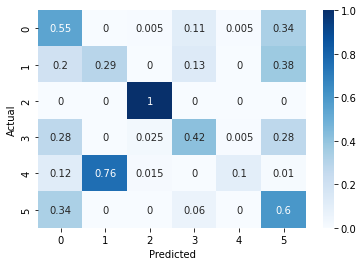

              precision    recall  f1-score   support

           0       0.37      0.55      0.44       200
           1       0.28      0.29      0.29       200
           2       0.96      1.00      0.98       200
           3       0.58      0.42      0.49       200
           4       0.91      0.10      0.18       200
           5       0.38      0.60      0.47       200

    accuracy                           0.49      1200
   macro avg       0.58      0.49      0.47      1200
weighted avg       0.58      0.49      0.47      1200



In [36]:
# Confusion Matrix using seaborn

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_test':    y_test,
        'y_pred': predictions
        }

df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Test'], colnames=['Predicted'])
sn.heatmap(normalized_df, annot=True, cmap="Blues")
plt.show()

from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

## Hyper-parameters tested 



### Table results

> Set | Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   6 | 50.83%   | 0.54      | 0.51   | 0.20 
> Surface |   6 | 44.42%   | 0.51      | 0.44   | 0.41 
> Mixed   |   6 | 49.42%   | 0.58      | 0.49   | 0.47
